# Summative 1: Get Data From API and create visualisations

## Imports

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install datetime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#The below code takes the link from the api and gets the file from the link to be able to turn it into data
api_link = 'https://api.covidtracking.com/v1/us/daily.json'
api_status = requests.get(api_link)
print(api_status.status_code)

200


As the above status code is 200 the connection was a success - if the status code is 403, the connection isn't approved and will have to try a different API

In [4]:
#The below code will take the JSON file, and take the data from this to be able to use in a pandas dataframe
data = api_status.text

In [13]:
df=pd.read_json(data)
df.head()

C:\Users\pjg20\AppData\Local\Temp\ipykernel_23632\791710275.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_json(data)


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


In [6]:
columns = list(df.columns.values)
columns

['date',
 'states',
 'positive',
 'negative',
 'pending',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'dateChecked',
 'death',
 'hospitalized',
 'totalTestResults',
 'lastModified',
 'recovered',
 'total',
 'posNeg',
 'deathIncrease',
 'hospitalizedIncrease',
 'negativeIncrease',
 'positiveIncrease',
 'totalTestResultsIncrease',
 'hash']

## Data Cleaning

Date column will need to be changed to a datetime column, hash column needs to be removed and we will have the cleaning done on this particular API data

However, for future proofing for the use of other APIs where the cleaning may not need to be done - this is a future feature that could be removed

Data Cleaning steps taken:
- Converting Date from an integer number to a datetime variable for plotting
- Re-ordering the data from earliest month to latest month
- Dropping Columns that aren't 100% relevant
- Replacing NaN values with 0

In [14]:
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
df

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,2021-03-07,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,2021-03-06,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,2021-03-05,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,2021-03-04,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,2021-03-03,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2020-01-17,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,NaN,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
416,2020-01-16,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,NaN,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
417,2020-01-15,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,NaN,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
418,2020-01-14,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,NaN,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8


In [15]:
df = df.sort_values(by='date')
df

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
419,2020-01-13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-13T24:00:00Z,NaN,0,0,0,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff
418,2020-01-14,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,NaN,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8
417,2020-01-15,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,NaN,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
416,2020-01-16,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,NaN,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
415,2020-01-17,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,NaN,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-03-03,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
3,2021-03-04,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
2,2021-03-05,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
1,2021-03-06,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0


In [9]:
columns

['date',
 'states',
 'positive',
 'negative',
 'pending',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'dateChecked',
 'death',
 'hospitalized',
 'totalTestResults',
 'lastModified',
 'recovered',
 'total',
 'posNeg',
 'deathIncrease',
 'hospitalizedIncrease',
 'negativeIncrease',
 'positiveIncrease',
 'totalTestResultsIncrease',
 'hash']

In [16]:
df = df.drop(columns = ['states', 'hash', 'total', 'posNeg','hospitalizedIncrease','negativeIncrease','positiveIncrease','totalTestResultsIncrease','lastModified',
 'totalTestResults', 'recovered'], axis = 1)
df

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,dateChecked,death,hospitalized,deathIncrease
419,2020-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-13T24:00:00Z,NaN,NaN,0
418,2020-01-14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-14T24:00:00Z,NaN,NaN,0
417,2020-01-15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-15T24:00:00Z,NaN,NaN,0
416,2020-01-16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-16T24:00:00Z,NaN,NaN,0
415,2020-01-17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-17T24:00:00Z,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-03-03,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,4260.0,2021-03-03T24:00:00Z,508665.0,770821.0,2449
3,2021-03-04,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,4267.0,2021-03-04T24:00:00Z,510408.0,772351.0,1743
2,2021-03-05,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,4275.0,2021-03-05T24:00:00Z,512629.0,775132.0,2221
1,2021-03-06,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,4280.0,2021-03-06T24:00:00Z,514309.0,775635.0,1680


In [22]:
df = df.replace(np.nan, 0)
df

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,dateChecked,death,hospitalized,deathIncrease
419,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-13T24:00:00Z,0.0,0.0,0
418,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-14T24:00:00Z,0.0,0.0,0
417,2020-01-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-15T24:00:00Z,0.0,0.0,0
416,2020-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-16T24:00:00Z,0.0,0.0,0
415,2020-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-17T24:00:00Z,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-03-03,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,4260.0,2021-03-03T24:00:00Z,508665.0,770821.0,2449
3,2021-03-04,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,4267.0,2021-03-04T24:00:00Z,510408.0,772351.0,1743
2,2021-03-05,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,4275.0,2021-03-05T24:00:00Z,512629.0,775132.0,2221
1,2021-03-06,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,4280.0,2021-03-06T24:00:00Z,514309.0,775635.0,1680


## Plots

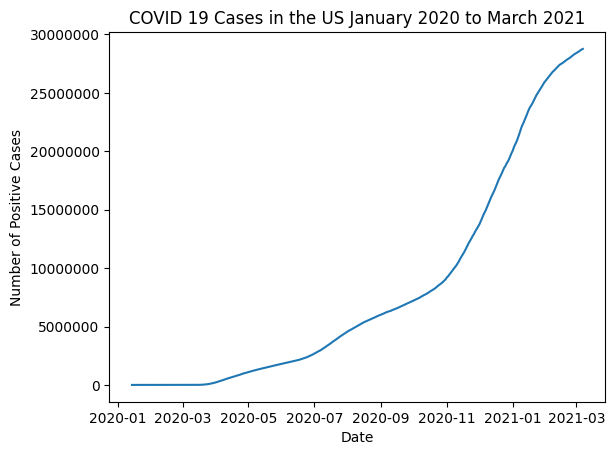

In [21]:
f = plt.figure()

plt.ticklabel_format(style = 'plain')

plt.title('COVID 19 Cases in the US January 2020 to March 2021')
plt.xlabel('Date')
plt.ylabel('Number of Positive Cases')

plt.set_xlim([datetime.date(2020, 1, 26), datetime.date(2014, 2, 1)])

plt.plot(df['date'], df['positive'])

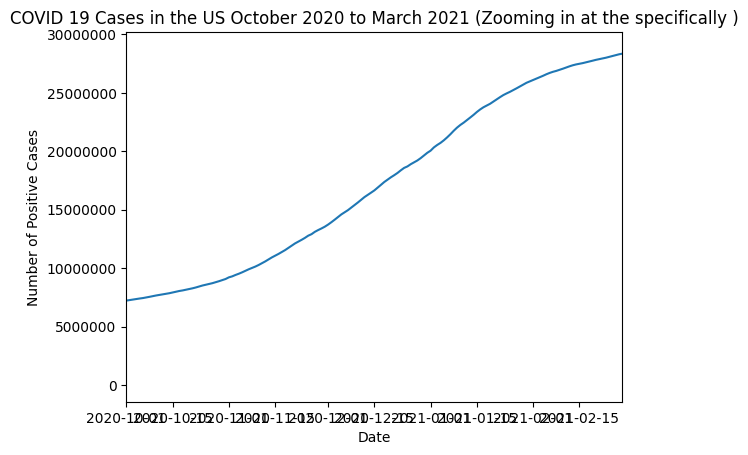

In [24]:
f = plt.figure()

plt.ticklabel_format(style = 'plain')

plt.title('COVID 19 Cases in the US October 2020 to March 2021 (Zooming in at the specifically )')
plt.xlabel('Date')
plt.ylabel('Number of Positive Cases')

plt.xlim([datetime.date(2020, 10, 1), datetime.date(2021, 2, 28)])

plt.plot(df['date'], df['positive'])